# STAT207 Final Project - What Makes a top Charting Song?

Daniel Feder (djfeder2), Rannin Gruen (regruen2), and Aamir Abjani (aabjani2)

In [58]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
import numpy as np

## 1. Introduction

### Motivation

This dataset focuses on a sample of songs that have been on the Top 200 Weekly Global charts of spotify in 2020 and 2021. There are a few different reasons as to why someone may want to view this type of dataset. Someone who is a fan of music could use this type of dataset to compare some of their favorite songs from 2020 and 2021 and determine how they differed in terms of performance. Another reason, which is also the reason we will focus on more in this report, that someone may find this type of dataset useful is that it could be used to compare the best of the best songs from these times in order to look into what factors about a song are associated with it performing well on the charts.

### Research Questions

#### Research Question 1: 
Question: Is there a linear relationship between a song's highest charting position and its streams, number of times chartered, artist followers, popularity, danceability, and energy?
<br> <br>Importance: This would be a helpful question for someone to ask if they wanted to gain an understanding of how well a particular song is going to perform or if they wanted to understand what factors influence the performance of a song (in terms of how well it charts). Having a better understanding of this could be used both in terms of allowing some to set expectations for the performance of a song, whether that be the song of their favorite artist or their own song, and can also be used to set benchmarks of what needs to be achieved in order for a song to chart well.

#### Research Question 2: 
Question: How accurately can we predict if a song will reach a highest charting posiiton within the Top 50 based off of its streams, artist followers, popularity rating, and number of times charted?
<br> <br> Importance: The results of this question could be useful in a couple of ways. It could provide an artist of which benchmarks their songs would typically have to reach in order for them to typically chart in the top 50. In a different respect, the results of this question could be used by a fan in order to attempt to predict which songs by their favorite artist were going to end up charting in the top 50.

#### Research Question 3: 
Question: Do songs written by artists with more than 7,000,000 followers chart better (lower charting position) than songs written by artists with less than 7,000,000 followers?
<br> <br> Importance: As a primary note, this number of 7,000,000 followers was chosen to its close proximty to the median number of artist followers of a song from this dataset (which can be seen in section 4 of the report). It is important to remember that this dataset includes all songs that have been on the top 200 at some point during 2020 or and/or 2021. With that in mind, the answer to this question could be helpful to know in order to determine if more popular artsits have an advantage in producing more popular songs, given that all of the songs being compared were highly successful. If this were the case, it would be helpful for less popular artists to know, because it would demonstrate the importance of growing your following as an artist, and not just in making the best songs.




### Dataset

Displayed below are the first 10 rows of the dataset, after it has been cleaned. This cleaned dataset has 496 rows and 41 columns.

In [59]:
df = pd.read_csv("spotify_top_200_sample.csv", na_values="missing")
df = df[df["Artist_Followers"] > 0]
df.head(10)


,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,r&b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,philly rap,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109,1,2/21/2020,2020,2,21,Interlude : Shadow,6655856,BTS,37151476.0,...,k-pop boy group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,135,15,8/28/2020,2020,8,28,El Mismo Aire - con Pablo Alborán,4705484,Camilo,10580764.0,...,reggaeton colombiano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47,1,6/25/2021,2021,6,25,LEMONHEAD (feat. 42 Dugg),11380679,"Tyler, The Creator",6777818.0,...,rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,76,17,6/26/2020,2020,6,26,Tak Tiki Tak,4761286,Harry Nach,134339.0,...,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,129,1,1/24/2020,2020,1,24,Donuts,6113037,Gzuz,1140383.0,...,german hip hop,hamburg hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.shape

(496, 41)

### Additional Thoughts Surrounding Data

#### Information Contained in this Dataset
This dataset is a sample from a larger dataset containing various information for songs that were on Spotify's Top 200 Weekly Global Charts at some point during 2020 and 2021. This information of the song include more general details about the song, such as its name, artist, and genre(s), and well as mosre descriptive data outlining just how well the song performed, such as the number of streams, the songs's highest charting position, and the number of times the song charted.
#### Limitations
One main limitation from this dataset has to do with the fact that includes data from 2020 and 2021, which means that at this point, the data is 2-3 years old. This is limiting through the fact that is means conclusions drawn from this data can't necessarily be applied to today, but rather have to be looked at knowing that the data is a bit outdated. Additionally, another limitation is that this is Spotify's top 200 global charts list. This means that ultimately, we can only look at what goes into a song's performance in through the lens of spotify, which does not necessarily equate to overall performance.
#### Additional Information we would add
There is some information that we think would be helpful if it was included in this dataset. One piece of information that we would add would how many songs an artist had chart on the top 200 list during 2020 and 2021. We think this would be helpul in looking at the affect the popularity of an artist has on the performance of a song. Another set of information that we would add would be information about the first time a song charted, not only information about its best charting.

## 2. Linear Regression and Feature Selection

### Research Question: 
Is there a linear relationship between a song's highest charting position and its streams, number of times chartered, artist followers, popularity, danceability, and energy?

### Linear Model

#### Summary Output for our Model

In [61]:
linear_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Danceability + Energy', data= df).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Highest_Charting_Position   R-squared:                       0.351
Model:                                   OLS   Adj. R-squared:                  0.343
Method:                        Least Squares   F-statistic:                     44.01
Date:                       Tue, 05 Dec 2023   Prob (F-statistic):           5.39e-43
Time:                               21:03:11   Log-Likelihood:                -2624.2
No. Observations:                        496   AIC:                             5262.
Df Residuals:                            489   BIC:                             5292.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 160.1263     15.800     10.134      0.000     129.081     191.171
Streams                  -6.74e-06   7.76e-07     -8.690      0.000   -8.26e-06   -5.22e-06
Number_of_Times_Charted    -1.6003      0.131    -12.198      0.000      -1.858      -1.343
Artist_Followers        -6.546e-07   1.28e-07     -5.125      0.000   -9.06e-07   -4.04e-07
Popularity                  0.0841      0.152      0.555      0.579      -0.214       0.382
Danceability               -8.9220     15.048     -0.593      0.554     -38.488      20.644
Energy                     -2.9849     13.417     -0.222      0.824     -29.347      23.378
==============================================================================
Omnibus:                       30.705   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.688
Skew:                           0.251   Prob(JB):                     0.000392
Kurtosis:                       2.288   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model Linear Regression Equation
Predicted Highest_Charting _Position = 160.1263 - 0.00000674(Streams) - 1.6003(Number_of_Times_Charted) - 0.000000546(Artist_Followers) + 0.0841(Popularity) - 8.9220(Danceability) - 2.9849(Energy)

#### Linear Conditions
These are the linear conditions for a model:
<br>1)Your response variable should be numerical.
<br>2)The relationship between your explanatory variables (all together) and your response variable should be linear

<br><br> The first condition is met because the highest charting position is a numeric response variable. However, there Ais concern over the secondard condition and the realtionship between our explanatory variables and response variables. As we move from left to right on the fitted values vs residuals plot, there are not an even number of positive and neagtive residuals. Because of this, a linear relationship may not be best for evaluating the relationship between these variables. For the sake of the report we will continue, but this is something to consider moving forward.

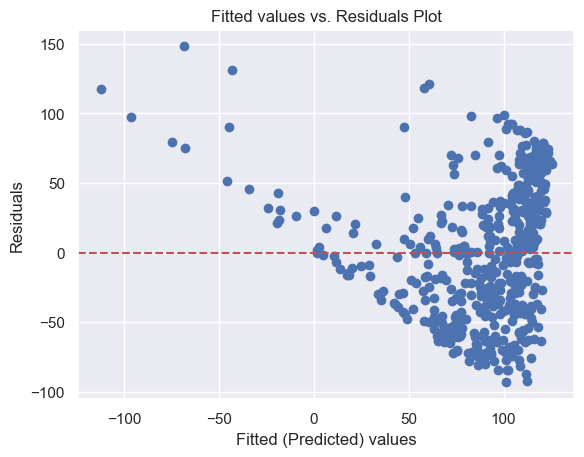

In [62]:
y_pred = linear_model.predict(df)
residuals = df["Highest_Charting_Position"] - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()

#### Feature Selection: Backward Elimination

Below, we decided to use backward elimination in order to determine out parsimonious model. We used backward selection because it is a good process for selecting a model with a high adjusted r-squared value given these above explanatory variables as options. 

In [63]:
current_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Danceability + Energy', data= df).fit()
current_model.rsquared_adj

0.34266334909861873

In [64]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Number_of_Times_Charted + Artist_Followers + Popularity + Danceability + Energy', data= df).fit()
test_model.rsquared_adj

0.24271092513436343

In [65]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Artist_Followers + Popularity + Danceability + Energy', data= df).fit()
test_model.rsquared_adj

0.14441292320256716

In [66]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Popularity + Danceability + Energy', data= df).fit()
test_model.rsquared_adj

0.30876326750536465

In [67]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Danceability + Energy', data= df).fit()
test_model.rsquared_adj

0.34359202052116655

In [68]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Energy', data= df).fit()
test_model.rsquared_adj

0.3435332533840558

In [69]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Danceability + Energy', data= df).fit()
test_model.rsquared_adj

0.34266334909861873

In [70]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Danceability', data= df).fit()
test_model.rsquared_adj

0.3439384603945712

Remove Energy

In [71]:
current_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity + Danceability', data= df).fit()
current_model.rsquared_adj

0.3439384603945712

In [72]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Number_of_Times_Charted + Artist_Followers + Popularity + Danceability', data= df).fit()
test_model.rsquared_adj

0.24409945253453846

In [73]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Artist_Followers + Popularity + Danceability', data= df).fit()
test_model.rsquared_adj

0.14297872113142718

In [74]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Popularity + Danceability', data= df).fit()
test_model.rsquared_adj

0.31015435060763685

In [75]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Danceability', data= df).fit()
test_model.rsquared_adj

0.3449048485231895

In [76]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Popularity', data= df).fit()
test_model.rsquared_adj

0.34476004746910593

Remove Popularity

In [77]:
current_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Danceability', data= df).fit()
current_model.rsquared_adj

0.3449048485231895

In [78]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Number_of_Times_Charted + Artist_Followers + Danceability', data= df).fit()
test_model.rsquared_adj

0.245168706409843

In [79]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Artist_Followers + Danceability', data= df).fit()
test_model.rsquared_adj

0.1392536179631335

In [80]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Danceability', data= df).fit()
test_model.rsquared_adj

0.3115540438827974

In [81]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers', data= df).fit()
test_model.rsquared_adj

0.3457985608316061

Remove Danceability

In [82]:
current_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers + Danceability', data= df).fit()
current_model.rsquared_adj

0.3449048485231895

In [83]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Number_of_Times_Charted + Artist_Followers', data= df).fit()
test_model.rsquared_adj

0.24668341060267118

In [84]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Artist_Followers', data= df).fit()
test_model.rsquared_adj

0.14065811973039366

In [85]:
test_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted', data= df).fit()
test_model.rsquared_adj

0.31286648324498123

#### Final Model After Backwards Elmination

In [86]:
final_model = smf.ols(formula='Highest_Charting_Position ~ Streams + Number_of_Times_Charted + Artist_Followers', data= df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Highest_Charting_Position   R-squared:                       0.350
Model:                                   OLS   Adj. R-squared:                  0.346
Method:                        Least Squares   F-statistic:                     88.22
Date:                       Tue, 05 Dec 2023   Prob (F-statistic):           1.09e-45
Time:                               21:03:12   Log-Likelihood:                -2624.5
No. Observations:                        496   AIC:                             5257.
Df Residuals:                            492   BIC:                             5274.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 157.1306      5.688     27.624      0.000     145.954     168.307
Streams                 -6.667e-06   7.66e-07     -8.700      0.000   -8.17e-06   -5.16e-06
Number_of_Times_Charted    -1.5818      0.127    -12.474      0.000      -1.831      -1.333
Artist_Followers        -6.408e-07   1.26e-07     -5.081      0.000   -8.89e-07   -3.93e-07
==============================================================================
Omnibus:                       30.376   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.805
Skew:                           0.257   Prob(JB):                     0.000370
Kurtosis:                       2.293   Cond. No.                     6.16e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.16e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Slope Coefficient Interpretation

Number_of_Times_Charted: The coefficient of -1.5818 for Number_of_Times_Charted means that for every additional increase in the number of times a song has been charted by 1, the highest charting position of that song is expected to decrease (improve) by 1.5818, on average, with Streams and Artist_Followers held constant.

#### R-Sqaured
The percent of variability in Highest_Charting_Position that is explained by our model is 0.350, as represented by our r-squared value. While this value is not incredibly low, it is still relatively low. This should not be particularly suprising, giving that we do not think a linear relationship is the best in this case (see explanation under discussion of conditions for linear model above).

#### Predicitions

In [87]:
df_predicted = df
df_predicted["Predicted_Highest_Charting_Position"] = final_model.predict(df)
df_predicted.head(15)

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Predicted_Highest_Charting_Position
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.379579
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.022770
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.103492
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.146982
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.824084
5,109,1,2/21/2020,2020,2,21,Interlude : Shadow,6655856,BTS,37151476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.366500
6,135,15,8/28/2020,2020,8,28,El Mismo Aire - con Pablo Alborán,4705484,Camilo,10580764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.250907
7,47,1,6/25/2021,2021,6,25,LEMONHEAD (feat. 42 Dugg),11380679,"Tyler, The Creator",6777818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.327669
8,76,17,6/26/2020,2020,6,26,Tak Tiki Tak,4761286,Harry Nach,134339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.409115
9,129,1,1/24/2020,2020,1,24,Donuts,6113037,Gzuz,1140383.0,...,hamburg hip hop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.060799


### Lineary Regression Anlaysis Implications on Research Questions 
Our analysis showed us a set of effective predictors to use based on our initial research question. Conclusions from this model should be taken with caution, due to teh fact that the conditions for linearity were not all met well. This linear model can help us to see general trends, such as the fact that a higher amounts of streams, a higher number of times charter, and a higher amount artist followers are all associated with a lower (better) highest charting position. However, the specifics of the model may not be particularly useful in addressing the research question.


## 3. Logistic Regression and Classification

### Research Question: 
How accurately can we predict if a song will reach a highest charting posiiton within the top 50 based off of its streams, artist followers, popularity rating, and number of times charted?

### Logistic Regression Model

#### Creating Top-50 Variable and Dividing Data into Train and Test Data

In [88]:
df["Top_50"] = 1*(df["Highest_Charting_Position"] <= 50)
df.head(15)

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Predicted_Highest_Charting_Position,Top_50
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.379579,1
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.022770,0
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.103492,0
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.146982,1
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.824084,1
5,109,1,2/21/2020,2020,2,21,Interlude : Shadow,6655856,BTS,37151476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.366500,0
6,135,15,8/28/2020,2020,8,28,El Mismo Aire - con Pablo Alborán,4705484,Camilo,10580764.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.250907,0
7,47,1,6/25/2021,2021,6,25,LEMONHEAD (feat. 42 Dugg),11380679,"Tyler, The Creator",6777818.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.327669,1
8,76,17,6/26/2020,2020,6,26,Tak Tiki Tak,4761286,Harry Nach,134339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.409115,0
9,129,1,1/24/2020,2020,1,24,Donuts,6113037,Gzuz,1140383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.060799,0


In [89]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state= 1111) 

  

#### Fitted Model Summary

In [90]:
logistic_regresssion_model = smf.logit('Top_50 ~ Streams + Artist_Followers + Popularity + Number_of_Times_Charted', data=df_train).fit()
logistic_regresssion_model.summary()


Optimization terminated successfully.
         Current function value: 0.457853
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Top_50   No. Observations:                  396
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            4
Date:                Tue, 05 Dec 2023   Pseudo R-squ.:                  0.2766
Time:                        21:03:12   Log-Likelihood:                -181.31
converged:                       True   LL-Null:                       -250.65
Covariance Type:            nonrobust   LLR p-value:                 5.406e-29
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -3.6581      0.723     -5.063      0.000      -5.074      -2.242
Streams                  3.425e-07   6.47e-08      5.290      0.000    2.16e-07    4.69e-07
Artist_Followers         2.643e-08   7.38e-09      3.581      0.000     1.2e-08    4.09e-08
Popularity                 -0.0090      0.009     -1.050      0.294      -0.026       0.008
Number_of_Times_Charted     0.0979      0.014      7.187      0.000       0.071       0.125
===========================================================================================
"""

#### Model Logistic Regression Equation

log_odds(Top_50) = -3.6581 + 0.0000003425(Streams) + 0.00000002643(Artist_Followers) - 0.009(Popularity) + 0.0979(Number_of_Times_Charted)

In [91]:
df_train["predictive_prob"] = logistic_regresssion_model.predict(df_train)

#### ROC Curve and AUC

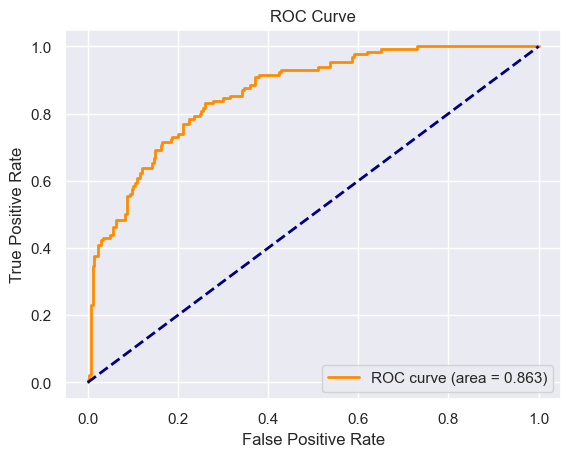

Train Data AUC: 0.8625216888374784


In [92]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

fprs, tprs, thresholds = roc_curve(df_train['Top_50'], df_train["predictive_prob"])
auc = roc_auc_score(y_true=df_train['Top_50'], y_score= df_train["predictive_prob"])
plt.plot(fprs, tprs, color='darkorange', lw=2, label='ROC curve (area = '+ str(round(auc,3))+')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show() 
print("Train Data AUC:", auc)


#### Determining Optimal Threshold

In [93]:
from sklearn.metrics import confusion_matrix
for thresh in np.arange(0, 1, 0.01):
    yhat = 1*(df_train["predictive_prob"] >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=df_train["Top_50"], y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    print(pd.DataFrame({'threshold':[thresh],'fpr':[fpr], 'tpr':[tpr]}))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold  fpr  tpr
0       0.05  1.0  1.0
   threshold  fpr  tpr
0       0.06  1.0  1.0
   threshold  fpr  tpr
0       0.07  1.0  1.0
   threshold       fpr  tpr
0       0.08  0.973684  1.0
   threshold       fpr  tpr
0       0.09  0.890977  1.0
   threshold       fpr  tpr
0        0.1  0.815789  1.0
   threshold      fpr  tpr
0       0.11  0.74812  1.0
   threshold       fpr       tpr
0       0.12  0.654135  0.992308
   threshold       fpr       tpr
0       0.13  0.612782  0.976923
   threshold       fpr       tpr
0       0.14  0.545113  0.953846
   threshold       fpr       tpr
0       0.15  0.492481  0.930769
   threshold       fpr       tpr
0       0.16  0.458647  0.930769
   threshold       fpr       tpr
0       0.17  0.409774  0.915385
   threshold  

As stated in the introduction to this report, this research question could be used in order to approximate benchmarks in order to evaluate what it takes for a song to chart in the top 50. We believe it would be worse to think a song will chart in the top 50 and be upset when it doesn’t than to be surprised and have a song chart in the top 50 that the model predicted wouldn’t. As a result, we want to minimize our false negatives. As shown above, a probability threshold of 0.33 corresponds to a location on the ROC curve with a relatively low false positive rate (0.1805). Additionally, after this point on the curve, the false positive rate begins to increase at a much faster rate than the true positive rate. For both of these reasons, a threshold of 0.33 is appropriate.

#### ROC Curve and AUC for Model on Test Data

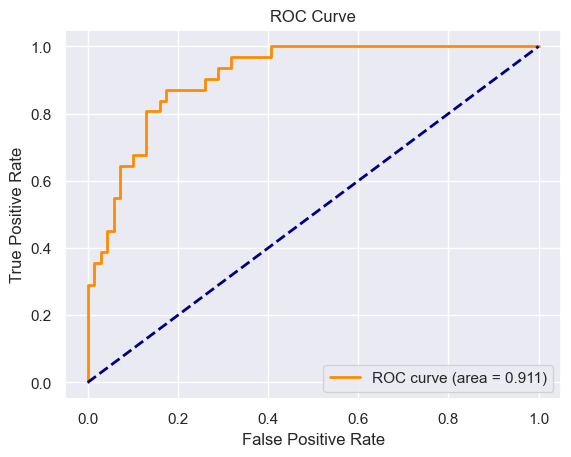

Test Data AUC: 0.9107059373539037


In [94]:
df_test["Top_50"] = 1*(df["Highest_Charting_Position"] <= 50)
df_test["predictive_prob"] = logistic_regresssion_model.predict(df_test)
fprs, tprs, thresholds = roc_curve(df_test['Top_50'], df_test["predictive_prob"])
auc = roc_auc_score(y_true=df_test['Top_50'], y_score= df_test["predictive_prob"])
plt.plot(fprs, tprs, color='darkorange', lw=2, label='ROC curve (area = '+ str(round(auc,3))+')')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show() 
print("Test Data AUC:", auc)

The AUC of the ROC curve for the test dataset (0.9107) is higher than the AUC of the ROC curve for the train data. This is an encouraging sign, as it suggests that our model would perform well on new data and is not overfit to the train data.

#### Classifying Test Data

In [95]:
threshold = 0.32
df_test["Top_50_Predicted"] = 1*(df_test["predictive_prob"] > threshold)
tn, fp, fn, tp = confusion_matrix(y_true=df_test["Top_50"], y_pred=df_test["Top_50_Predicted"]).ravel()
accuracy = (tn+tp)/(tn+tp+fn+fp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print("Accuracy Rate:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Accuracy Rate: 0.85
Sensitivity: 0.8064516129032258
Specificity: 0.8695652173913043


This logistic regression analysis helps answer our research question by proving a relatively effective model that can predict whether a song will chart in the top 50 (as demonstrated by the accuracy rate of 85% on the test data). It also articulates the association between a song charting multiple times on its chances of charting in the top 50, as demonstrated by the fact that the coefficient for the number of times charted was the largest coefficient in the model.

## 4. Descriptive Analytics and Inference

### Research Question

Question related to this dataset: Do songs written by artists with more than 7,000,000 followers chart better (lower mean charting position) than songs written by artists with less than 7,000,000 followers?

<br><br>Do all songs on Spotify charted in the top 200 during 2020/2021 written by artists with more than 7,000,000 followers chart better than artists with less than 7,000,000 followers?


#### Creating 7 Million Followers Variable and Visualizing Relationship Between Variables of Interest 

In [96]:
print(df["Artist_Followers"].median())
df["7_Million_Followers"] = df["Artist_Followers"] >= 7000000
df.head()

6930216.0


,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Predicted_Highest_Charting_Position,Top_50,7_Million_Followers
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.379579,1,False
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.022770,0,False
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.103492,0,True
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.146982,1,True
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.824084,1,True


<Axes: xlabel='7_Million_Followers', ylabel='Highest_Charting_Position'>

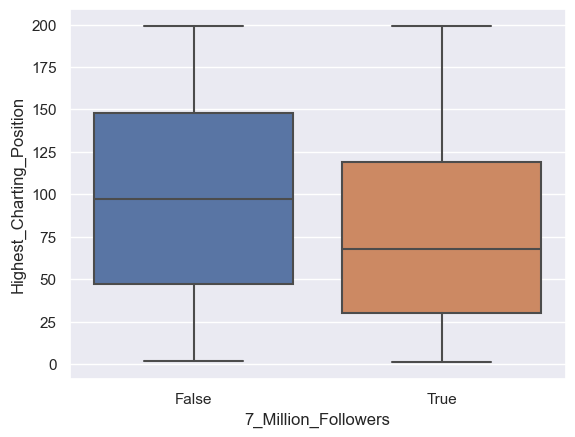

In [97]:
sns.boxplot(x=df["7_Million_Followers"],y=df["Highest_Charting_Position"])

The visualization tells us that artists with followers of more than 7,000,000 have a lower highest chartered position which means that the songs were rated higher. This is demonstrated by the fact that songs written by artists with at least 7 million followers have a lower (better) mean highest charting position than songs written by artists with less than 7 million follows. Additionally, the spreads of the two boxplit seem to be fairly similar, and neither appear to have any outliers. 


### Hypothesis Test

#### Null and Alternative Hypotheses

Ho: µ1 - µ2 = 0
<br>Ha: µ1 - µ2 < 0

<br>Where µ1 is the mean charting position for songs written by artists with more than 7,000,000 followers and µ2 is the mean charting position for songs written by artists with less than 7,000,000 followers. (As a reminder, a lower charting position is better)



#### Significance Level
We will use a significance Level of 5%, as that is very standard in statsical fields.

#### Conditions

1) Sample is representative of the population 

2) Observations are independent of each other

The first condition is true because this data is a random sample of songs from the Top 200 Weekly Global charts of Spotify in the years 2020 and 2021 (the population).
<br>The second condition is met because each observation represents a unique song.

#### Simulated Sampling Distribution

In [98]:
df

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11,Predicted_Highest_Charting_Position,Top_50,7_Million_Followers
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.379579,1,False
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.022770,0,False
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.103492,0,True
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.146982,1,True
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.824084,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,30,9,4/10/2020,2020,4,10,Level of Concern,4252898,Twenty One Pilots,20829526.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.192027,1,True
496,29,15,1/24/2020,2020,1,24,What If I Told You That I Love You,5234645,Ali Gatie,1758300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.376106,1,False
497,193,1,2/12/2021,2021,2,12,Wonderwall,4902737,Oasis,6478565.0,...,rock,NaN,NaN,NaN,NaN,NaN,NaN,118.709593,0,False
498,6,7,12/18/2020,2020,12,18,It's Beginning to Look a Lot like Christmas,15424001,Michael Bublé,4702232.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.208948,1,False


array([[<Axes: title={'center': 'x'}>]], dtype=object)

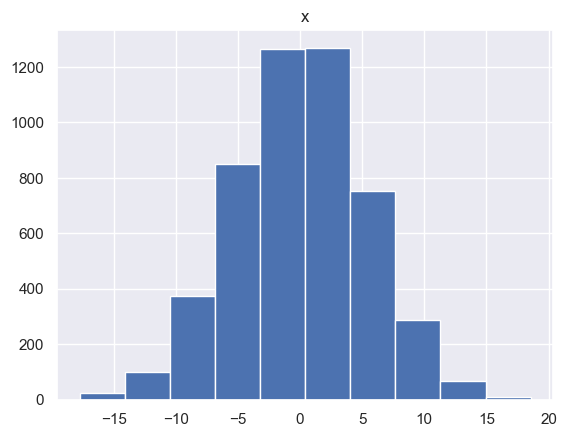

In [99]:
samp_dist = []
for i in range(5000):
    df_new = pd.DataFrame({"Highest_Charting_Position": df["Highest_Charting_Position"].sample(496, replace= False)})
    df_new = df_new.reset_index()
    df_new["7_Million_Followers"] = df["7_Million_Followers"]
    samp_dist.append(df_new[df_new["7_Million_Followers"] == True]["Highest_Charting_Position"].mean() - df_new[df_new["7_Million_Followers"] == False]["Highest_Charting_Position"].mean())
samp_dist = pd.DataFrame({"x": samp_dist})
samp_dist.hist()


#### P-Value Calculation and Interpretation

In [100]:
sample_diff = df[df["7_Million_Followers"] == True]["Highest_Charting_Position"].mean() - df[df["7_Million_Followers"] == False]["Highest_Charting_Position"].mean()
print("Difference in our Sample:", sample_diff)
print("P-Value:", (samp_dist["x"] < sample_diff).mean())

Difference in our Sample: -19.34710501926736
P-Value: 0.0


Since our p-value of 0.0004 is below our significance level of 0.05, we have sufficient evidence to reject the null hypothesis. Referring back to our research question, we have sufficient evidence to believe that songs made by artists with more than 7,000,000 followers will chart better (lower) than songs made by artists with less than 7,000,000 followers.


## 5. Conclusion

### Summarization
Through our work and results we were able to answer our research questions. From our first analysis which was linear regression we found that there wasn’t really a linear relationship between our predictor variables and a song’s highest charting position. However, this linear model can help us to see general trends, such as the fact that a greater number of streams, number of times charter, and artist followers are all associated with a lower (better) highest charting position.Through logistic regression we concluded that we can pretty accurately predict if a song was in the top 50 through our 85% accuracy rate and our low false positive rate of 18%. Additionally, the logistic model demonstrates the association between a song charting multiple times on its chances of charting in the top 50. Finally, through inference and sample distribution we took away that songs created by artists with more than 7,000,000 followers will in fact chart tend to chart better (halower highest charting position) than songs created by artists with less followers.
 




### Limitations
When creating our model there were a few key limitations. The first was that we felt our analysis would have benefitted from the data having more information being available about this song. We feel this would’ve helped us to gather a better linear model and would’ve improved model performance overall. Another thing we felt was a limitation was that this dataset was based on Spotify’s Top 200 List. We felt that since these are only Spotify’s top 200, it may not be safe to make assumptions about the success and performance of songs overall. Finally, the last thing we considered to be a limitation was that this data was 2-3 years old. We felt that this was limiting the interpretation of our model since the work we were doing couldn’t really be applied to our world today. This data being only Spotify’s and being 2-3 years old was definitely something we had to take into consideration before making our claims. We had to realize that our data was only from a certain niche of users and was slightly outdated, so it should be expected for our results to not perfectly apply to 2023.

### Future Work
Going forward if someone were to do work from the data in the Top 200 Spotify dataset we believe research questions such as is there a linear relationship between the number of streams one song gets and predictor variables such as highest charting position, popularity, and number of times charted or does a song with higher danceability have a higher energy rating than a song with lower danceability? Questions such as this one, which address the performance of songs in additional ways other than just charting position, may be well suited to be answered by the top 200 spotify dataset and are also interesting questions to answer at the same time. Overall, we would want to further dive into what drives the high performance of certain songs from different lenses. 
